# Exercici 1: Seleccionar una API pública i extreure dades

Per resoldre aquest primer exercici hem seleccionat la API de [JokeAPI](https://jokeapi.dev/), que proporciona una gran quantitat d'acudits de diferents categories. Aquesta API és molt senzilla d'utilitzar i no requereix cap tipus d'autenticació. Dins d'aquesta API, utilitzarem la categoria de "Programming" per extreure acudits relacionats amb la programació i el tipus "single" per evitar el format de pregunta/resposta.

La resposta de la API és un JSON amb diferents camps, on hi destaca el camp "joke" que conté l'acudit en sí. A continuació, es mostra un exemple de la resposta de la API quan es realitza una petició GET:

```json
{
    "error": false,
    "category": "Misc",
    "type": "single",
    "joke": "What does the MacBook have in common with Donald Trump?\n\nI would tell you....\nBut I don't compare apples to oranges.",
    "flags": {
        "nsfw": false,
        "religious": false,
        "political": true,
        "racist": false,
        "sexist": false,
        "explicit": false
    },
    "id": 233,
    "safe": false,
    "lang": "en"
}
```

Implementem el codi necessari per extreure acudits de la API de JokeAPI:

In [2]:
import requests

In [7]:
url = "https://v2.jokeapi.dev/joke/Programming?type=single"
response = requests.get(url)

if response.status_code == 200:
    joke = response.json()['joke']
    print(joke)
else:
    print(f"Error: {response.status_code}")

A SQL statement walks into a bar and sees two tables.
It approaches, and asks "may I join you?"


# Exercici 2: Utilitzar tècniques de web scraping per extreure dades d'una pàgina web

En aquest segon exercici, utilitzarem la llibreria BeautifulSoup de Python per extreure dades d'una pàgina web. En aquest cas, extreurem les dades de la pàgina web [Naturally Funny](https://naturallyfunny.com/database-jokes/), que conté 731 acudits relacionats amb el món de la programació.

Primer realitzem una inspecció manual de la pàgina, on podem observar que els acudits es troben en llistes.
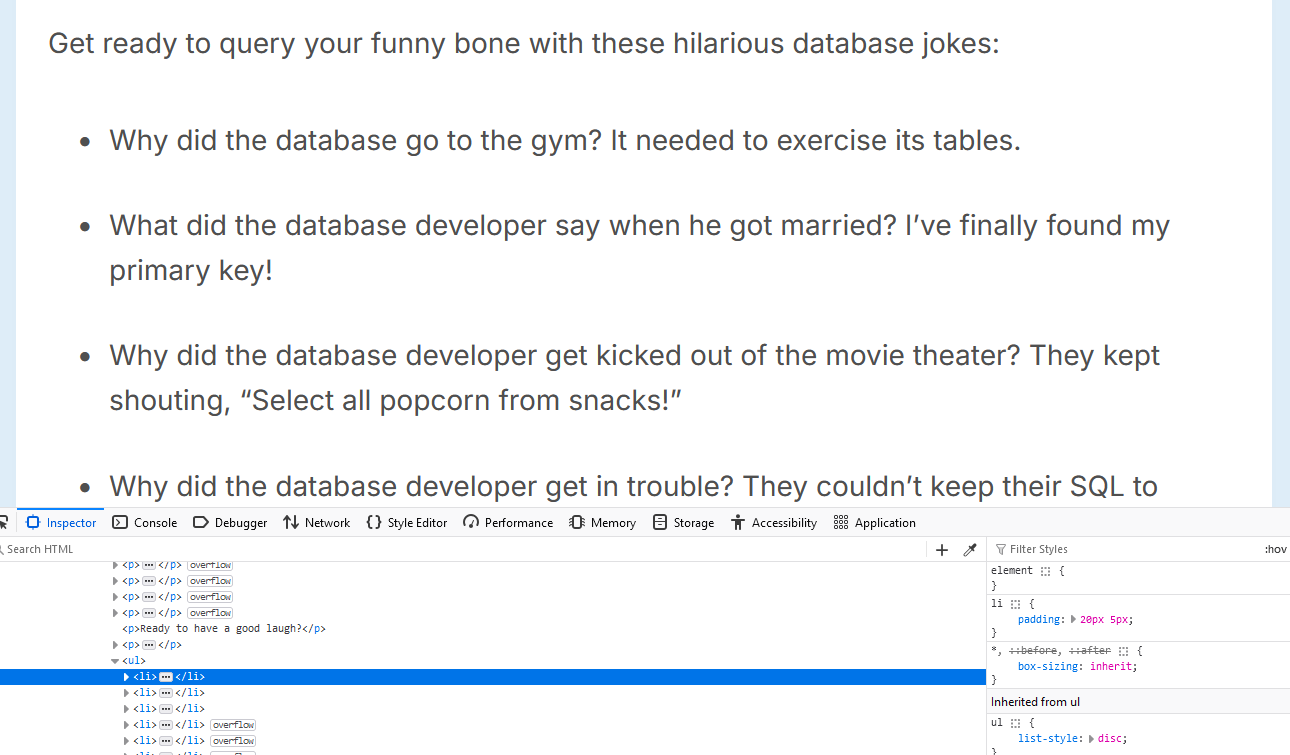

Així doncs, prodecim a extreure la informació de la pàgina web

In [10]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [11]:
url = "https://naturallyfunny.com/database-jokes/"

# descarreguem la pàgina web
response = requests.get(url)
html_content = response.text

# analitzem el contingut HTML amb BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# creem una llista per guardar els acudits
jokes = []

# donat que els acudits són dins de tags <li> els busquem directament
for li in soup.find_all("li"):
    joke_text = li.get_text(strip=True)
    if joke_text:
        jokes.append(joke_text)

In [12]:
print(jokes)

['Home', 'About', 'Blog', 'Contact', 'Jokes', 'Puns', 'Dad Jokes', 'Why did the database go to the gym? It needed to exercise its tables.', 'What did the database developer say when he got married? I’ve finally found my primary key!', 'Why did the database developer get kicked out of the movie theater? They kept shouting, “Select all popcorn from snacks!”', 'Why did the database developer get in trouble? They couldn’t keep their SQL to themselves!', 'Why did the database developer bring a shovel to work? They were digging deep for those query results!', 'Why do databases make great comedians? Because they always deliver punchlines with their SQL queries!', 'Why did the database consultant always carry a map? In case he got lost in the foreign keys!', 'Why did the database administrator go to therapy? Because he had too many relational issues.', 'Why did the database refuse to commit? It was afraid of a relational breakup!', 'What’s a database’s favorite type of music? Hip-hop because t

Es pot veure que, a part dels acudits que volíem extreure, també s'han extret altres elements de la pàgina web, com els diferents menús. Això és degut a que hem utilitzat la funció `find_all` de BeautifulSoup per trobar tots els elements de la pàgina que compleixen amb un determinat criteri.

Donat que els acudits acostumen a tenir una llargada de text més gran que la resta de contingut de la pàgina, podem filtrar els acudits basant-nos en la llargada del text. Això ens permetrà extreure només els acudits i ignorar la resta de contingut de la pàgina. Per fer-ho, fem un anàlisi molt bàsic de la llargada dels textos extrets i seleccionem aquells que tenen una llargada superior a un determinat llindar.

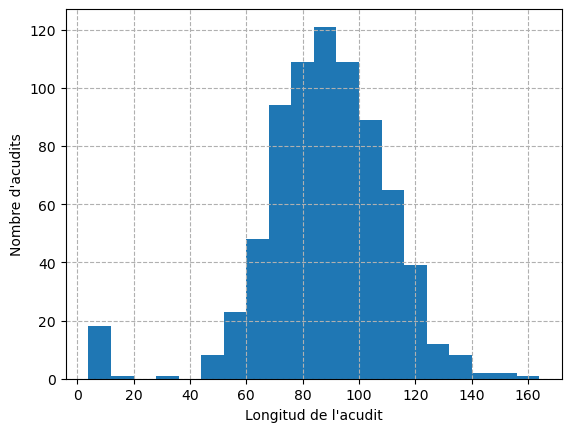

In [ ]:
# generar histograma amb la longitud de cada acudit extret
lengths = [len(joke) for joke in jokes]
plt.hist(lengths, bins=20)
plt.xlabel("Longitud de l'acudit")
plt.ylabel("Nombre d'acudits")
plt.grid(linestyle="--")
plt.show()

Veiem que sembla que hi ha dos grups diferenciats: aquells textos molt curts i una distribució normal que correspondria amb els acudits. Establim un llindar de 30 caràcters per separar els acudits de la resta de textos.

In [ ]:
# filtrem els acudits amb una logitud superior als 30 caràcters
long_jokes = [joke for joke in jokes if len(joke) > 30]
print(len(long_jokes))
print(long_jokes)

731
['Why did the database go to the gym? It needed to exercise its tables.', 'What did the database developer say when he got married? I’ve finally found my primary key!', 'Why did the database developer get kicked out of the movie theater? They kept shouting, “Select all popcorn from snacks!”', 'Why did the database developer get in trouble? They couldn’t keep their SQL to themselves!', 'Why did the database developer bring a shovel to work? They were digging deep for those query results!', 'Why do databases make great comedians? Because they always deliver punchlines with their SQL queries!', 'Why did the database consultant always carry a map? In case he got lost in the foreign keys!', 'Why did the database administrator go to therapy? Because he had too many relational issues.', 'Why did the database refuse to commit? It was afraid of a relational breakup!', 'What’s a database’s favorite type of music? Hip-hop because they love tables.', 'Why did the database programmer bring a wa

Segons la pàgina de la que hem extret els acudits, hi ha 731, que coincideix amb el nombre d'acudits que hem extret. Això ens indica que hem extret tots els acudits de la pàgina web.